model name:  ../models_storage/mahalanobis_class-specific_75.0
loading data
train shape: (42000, 784)
labels shape: (42000,)


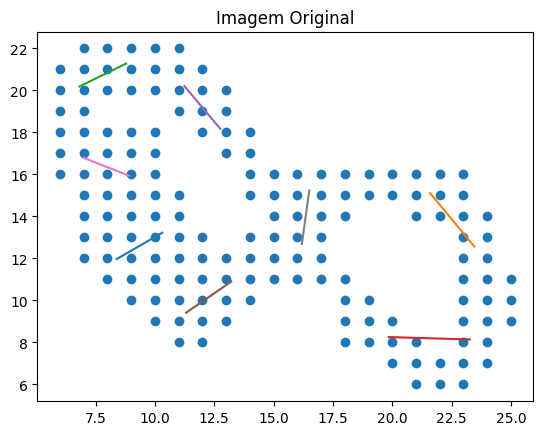

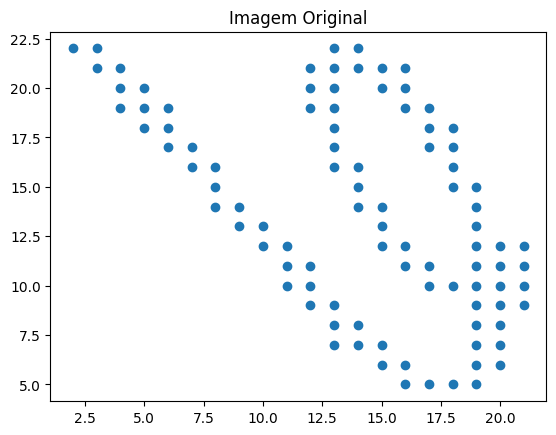

In [95]:
import pandas as pd
import numpy as np
from sklearn.mixture import BayesianGaussianMixture
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

variance_perc_threshold=0.75
model_name = f"../models_storage/mahalanobis_class-specific_{ variance_perc_threshold * 100 }"
print("model name: ", model_name)

def load_data(file_path): 
    print("loading data")
    all_data = pd.read_csv(file_path)
    train_data = all_data.to_numpy()[:, 1:]
    labels = all_data.to_numpy()[:, 0]
    print(f"train shape: {train_data.shape}")
    print(f"labels shape: {labels.shape}")
    
    return train_data, labels

train_data_file_path = 'C:/src/data_analysis/data/digit-recognizer/train.csv'
X_train, y_train = load_data(train_data_file_path)

def sample_image(row):
    # Selecionar uma amostra
    sample_image = row.reshape(28,28) # Escolher a primeira imagem (28x28)
    rows, cols = np.nonzero(np.where(sample_image > 150, sample_image, 0 ))  # Obtemos as coordenadas (x, y) dos pixels não nulos

    # Combinar as coordenadas (x, y) e as intensidades
    data = np.stack([rows, cols], axis=1)
    # Passo 2: Visualizar a imagem original

    return data

img1 = sample_image(X_train[10])
img2 = sample_image(X_train[21])
k = 8 # Number of clusters
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
labels = kmeans.fit_predict(img1)
centers = kmeans.cluster_centers_

def create_segment(center, cluster_points):        
    pca = PCA(n_components=1)
    pca.fit(cluster_points)
    direction = pca.components_[0]
    std_dev = np.sqrt(pca.explained_variance_[0])           
    length = 3 / 2 * std_dev
    startpoint = center - length / 2 * direction    
    endpoint = center + length / 2 * direction
    return np.array([startpoint, endpoint])
    
segs = []
for cluster_id, center in enumerate(centers):
    points = img1[labels == cluster_id]
    segment = create_segment(center, points)
    segs.append(segment) 

plt.scatter(img1[:,0],img1[:,1])
seq1 = []
for seg in segs:
    plt.plot(seg[:,0],seg[:,1])
    # seq1.append(seg[0])
    # seq1.append(seg[1])
plt.title("Imagem Original")
plt.show()
seq1.extend(centers)

kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
labels = kmeans.fit_predict(img2)
centers = kmeans.cluster_centers_
segs2 = []
for cluster_id, center in enumerate(centers):
    points = img2[labels == cluster_id]
    segment = create_segment(center, points)
    segs2.append(segment) 

plt.scatter(img2[:,0],img2[:,1])
seq2 = []
# for seg in segs2:
#     plt.plot(seg[:,0],seg[:,1])
#     seq2.append(seg[0])
#     seq2.append(seg[1])
seq2.extend(centers)
plt.title("Imagem Original")
plt.show()
# plt.imshow(segmented_image0, cmap='tab10')  # Cada componente recebe uma cor
# plt.title("Segmentação por Gaussian Mixture")



Distância DTW: 53.05647767593704
Caminho de alinhamento: [(0, 0), (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 7)]


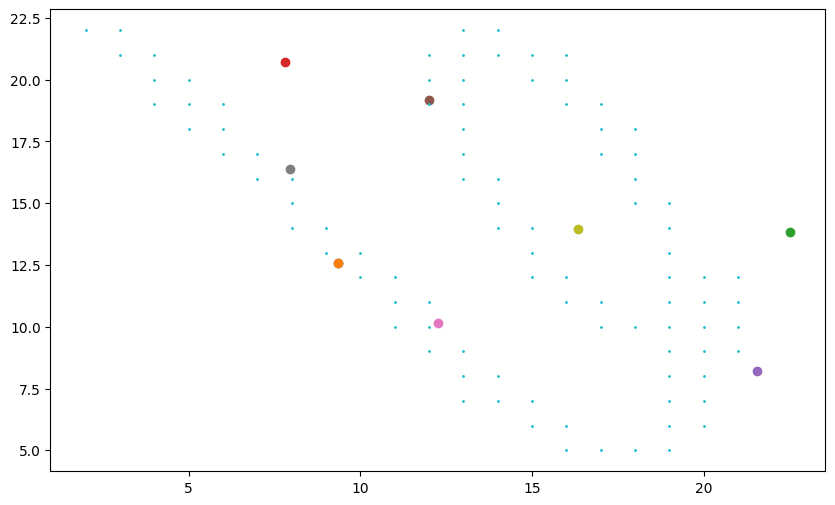

In [116]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

# Aplicar DTW
distance, path = fastdtw(seq1, dist=euclidean)

# Exibir resultados
print("Distância DTW:", distance)
print("Caminho de alinhamento:", path)


# Visualizar o alinhamento
plt.figure(figsize=(10, 6))
for (i, j) in path:
    plt.scatter(seq1[i][0],seq1[i][1])
plt.scatter(img2[:,0],img2[:,1], s=1)
plt.show()

C:\Users\gabriel\AppData\Local\Temp\ipykernel_9464\600791621.py:10: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_elements = hessian_matrix(image, sigma=sigma, order='xy')  # Compute Hessian matrix


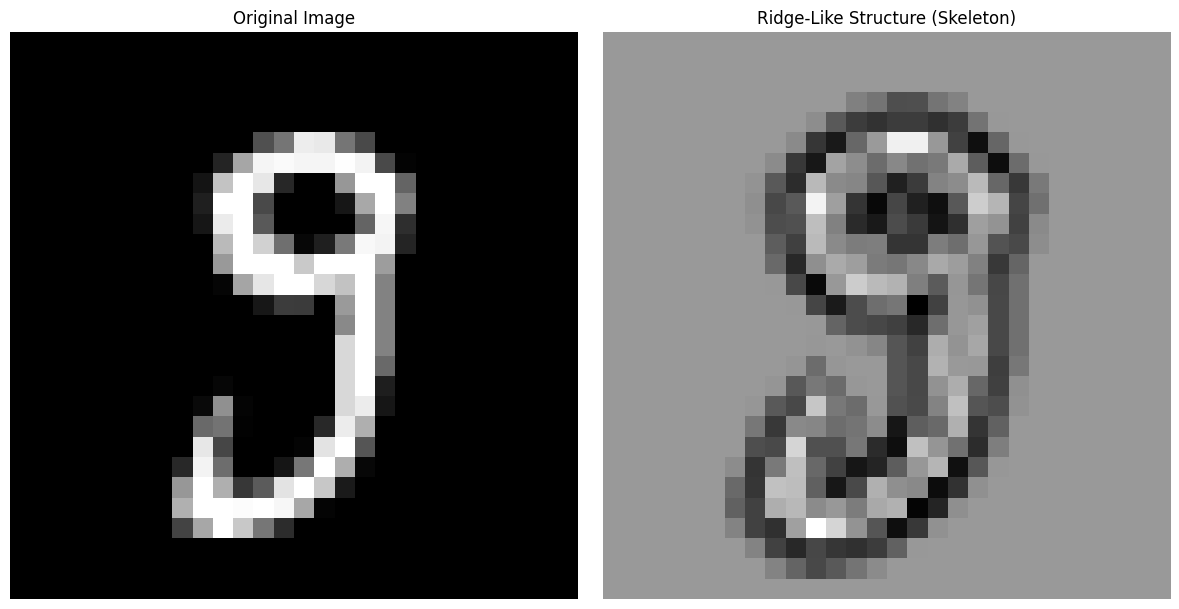

In [113]:
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from skimage import io, img_as_float
import matplotlib.pyplot as plt

# Load a grayscale image
image = X_train[40].reshape(28, 28)/255.0

# Apply Hessian matrix analysis
sigma = 0.1  # Scale of detection
hessian_elements = hessian_matrix(image, sigma=sigma, order='xy')  # Compute Hessian matrix
eigenvals = hessian_matrix_eigvals(hessian_elements)  # Extract eigenvalues

# The first eigenvalue highlights ridge-like structures
ridge_like_structure = -eigenvals[0]  # Negate to make ridges positive

# Normalize for better visualization
ridge_like_structure = (ridge_like_structure - ridge_like_structure.mean())

# Plot the original and ridge-like structure
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Ridge-Like Structure (Skeleton)")
plt.imshow(ridge_like_structure, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()